# Numpy

This notebook focuses on the numpy library, which is used to perform multi-dimensional matrix operations efficiently. It is an underpinning to a lot of higher level libraries (tensor flow, scikit learn, pandas). It can be useful to understand the basics, so that when one of these higher level libraries doesn't do exactly what you want, you can tweak the underlying numpy array instead.

In [3]:
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt


To whet your appetite, take a look at the following example which combines numpy with the Audio rich content display. The first cell demonstrates the creation of beats from interference. The second cell shows how intermittent noise can effect the audio quality.

**EXERCISE:** Adjust the frequencies, sampling rate, duration, and volume until you're satisfied.

In [4]:
from IPython.display import Audio

f1 = 220.0
f2 = 222.0
sampling_rate = 8000
duration = 3

times = np.linspace(0, duration, duration*sampling_rate)
tone = lambda f : np.sin(2 * np.pi * f * times)
signal = tone(f1) + tone(f2)

Audio(data=signal, rate=sampling_rate)

In [6]:
volume = 0.1

mask = np.random.choice([True, False], size=len(times))
noise = np.random.rand(sum(mask)) * volume
signal = tone(f1)
signal[mask] += noise

Audio(data=signal, rate=sampling_rate)

Let's focus on three features of numpy that these examples partially illustrate. 
There are many other features of numpy, but these three form the core utilities.
1. Creating arrays
2. Indexing, Slicing, and Filtering
3. Vectorized Operations

## Creating arrays

There are three primary ways to create numpy arrays: literals, built in functions, and reading files.

In [9]:
literal_example_1d = np.array([1,9,-1,4])
literal_example_2d = np.array([[1,0], [0,-1]])
print(literal_example_1d.shape, " Example: \n", literal_example_1d)
print(literal_example_2d.shape, " Example: \n", literal_example_2d)

(4,)  Example: 
 [ 1  9 -1  4]
(2, 2)  Example: 
 [[ 1  0]
 [ 0 -1]]


In [10]:
print(np.arange(-1, 1, 0.1))
print(np.logspace(0, 9, 10, base=2))
x, y = np.mgrid[0:5, 0:5]
print(x, "\n", y)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]] 
 [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


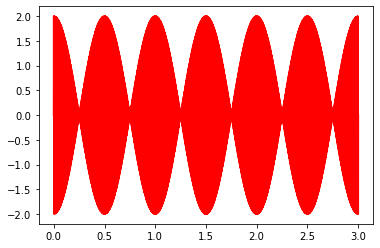

In [11]:
data = np.genfromtxt('beats.csv', delimiter = ",")
x = data[:,0]
y = data[:,1]
plt.figure()
plt.plot(x, y, 'r-', linewidth=2)

**EXERCISE:** Can you spot the three built in numpy functions that were used to construct the arrays in the audio examples at the beginning of this notebook?

## Indexing, Slicing, and Masks

Once an array is created, one of the next most common steps is selecting or updating elements of the array. This can be done simply with the usual syntax for indexing and slicing lists in python. But there's also several forms of fancier slicing.

In [13]:
playground = np.random.randn(3,3,3)
print(playground)

[[[ 0.89617716 -1.5860118  -1.1829514 ]
  [ 0.80529841 -0.1045192   0.37032563]
  [-1.00924904 -0.06628471  0.19677227]]

 [[ 0.59802723  0.56469536 -0.00313897]
  [-0.63677544  0.78121018 -2.31695539]
  [-0.70369938 -2.1874294   0.30970386]]

 [[-1.17430761 -0.12447304  0.21184129]
  [ 0.59468031 -1.0487021   2.21465624]
  [-1.04798636  1.37026872  1.90927346]]]


In [14]:
print(playground[0,1,-1], "\n")
print(playground[:,:,-1], "\n")
print(playground[::-1,1,2], "\n")
print(playground[[0,-1]], "\n")

0.37032562855964235 

[[-1.1829514   0.37032563  0.19677227]
 [-0.00313897 -2.31695539  0.30970386]
 [ 0.21184129  2.21465624  1.90927346]] 

[ 2.21465624 -2.31695539  0.37032563] 

[[[ 0.89617716 -1.5860118  -1.1829514 ]
  [ 0.80529841 -0.1045192   0.37032563]
  [-1.00924904 -0.06628471  0.19677227]]

 [[-1.17430761 -0.12447304  0.21184129]
  [ 0.59468031 -1.0487021   2.21465624]
  [-1.04798636  1.37026872  1.90927346]]] 



Aside from indexing and slicing (including fancy slicing), masks are a very useful way to select elements based on one or more conditions.

In [15]:
positive_sigma_mask = (playground > 0) * (playground < 1)
print(positive_sigma_mask, "\n")
print(playground, "\n")
print(playground[positive_sigma_mask], "\n")

[[[ True False False]
  [ True False  True]
  [False False  True]]

 [[ True  True False]
  [False  True False]
  [False False  True]]

 [[False False  True]
  [ True False False]
  [False False False]]] 

[[[ 0.89617716 -1.5860118  -1.1829514 ]
  [ 0.80529841 -0.1045192   0.37032563]
  [-1.00924904 -0.06628471  0.19677227]]

 [[ 0.59802723  0.56469536 -0.00313897]
  [-0.63677544  0.78121018 -2.31695539]
  [-0.70369938 -2.1874294   0.30970386]]

 [[-1.17430761 -0.12447304  0.21184129]
  [ 0.59468031 -1.0487021   2.21465624]
  [-1.04798636  1.37026872  1.90927346]]] 

[0.89617716 0.80529841 0.37032563 0.19677227 0.59802723 0.56469536
 0.78121018 0.30970386 0.21184129 0.59468031] 



Masks also also useful for updating select elements, while leaving others alone.

In [17]:
playground[positive_sigma_mask] = 0
print(playground)

[[[ 0.         -1.5860118  -1.1829514 ]
  [ 0.         -0.1045192   0.        ]
  [-1.00924904 -0.06628471  0.        ]]

 [[ 0.          0.         -0.00313897]
  [-0.63677544  0.         -2.31695539]
  [-0.70369938 -2.1874294   0.        ]]

 [[-1.17430761 -0.12447304  0.        ]
  [ 0.         -1.0487021   2.21465624]
  [-1.04798636  1.37026872  1.90927346]]]


In [22]:
print(playground[0])
print(playground[:,0])
print(playground[:,:,0])

[[ 0.         -1.5860118  -1.1829514 ]
 [ 0.         -0.1045192   0.        ]
 [-1.00924904 -0.06628471  0.        ]]
[[ 0.         -1.5860118  -1.1829514 ]
 [ 0.          0.         -0.00313897]
 [-1.17430761 -0.12447304  0.        ]]
[[ 0.          0.         -1.00924904]
 [ 0.         -0.63677544 -0.70369938]
 [-1.17430761  0.         -1.04798636]]


**EXERCISES:** 
1. Can you grab the first matrix, all of the first rows, and all of the first columns as three separate slicing operations on playground? 
2. What is the effect of the mask used in the noisy audio signal example?

## Vector Operations

One of the major performance advantages of numpy over standard lists is that most operations are vectorized over the elements of the list. For example, elementwise multiplication can be sped up several orders of magnitude for a large array.  

In [115]:
x_np = np.random.randn(1000)
x_list = [x for x in x_np]
%timeit [x*x for x in x_list]
%timeit x_np * x_np

86.3 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.18 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


This kind of speedup is essential for working with big data or complex algorithms where basic operations may be performed trillions of times in one run of the program. However, it can come with a significant learning curve for those unaccustomed to thinking in a vectorized fashion. Will start with the basic operations.

In [23]:
x = np.array([[0, 1, 2]])
A = np.array([[1,-1, 0], 
              [2, 0, 1]])
c = 5

print(x + c)
print(A - c)
print(A + x)

[5 6 7]
[[-4 -6 -5]
 [-3 -5 -4]]
[[1 0 2]
 [2 1 3]]


In [29]:
print(x * c)
print(x * x)
print(x / x)
print(A * x)

[ 0  5 10]
[0 1 4]
[nan  1.  1.]
[[ 0 -1  0]
 [ 0  0  2]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Notice that, by default, all of the arithmetic operations are applied elementwise (with broadcasting). What if you want to apply matrix operations? There's a couple options:

In [31]:
print(A,x)
print(A.dot(x))
print(A @ x)
print(np.matrix(A) * np.matrix(x).T)

[[ 1 -1  0]
 [ 2  0  1]] [0 1 2]
[-1  2]
[-1  2]
[[-1]
 [ 2]]


**EXERCISE:** How can the last line be rewritten to produce a row vector, instead of a column vector?

# CHALLENGE:
1. Write a function to compute the inverse of a 2x2 array. You may use the det function, but not inv. However, you are free to check your function using the inv function.